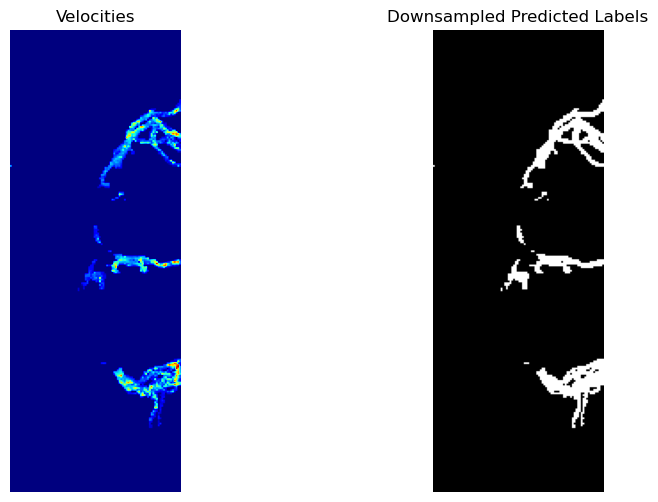

In [3]:
from scipy.io import loadmat
import os
import nrrd
from scipy.ndimage import zoom
import numpy as np
from matplotlib import pyplot as plt

vel_struct_path = "data/vel_struct.mat"
vel_struct = loadmat(vel_struct_path,struct_as_record=False)
velocities = vel_struct['mrStruct'][0,0].dataAy
predicted_labels_path = "Predictions/test/1111-pred.nrrd"
predicted_labels, _ = nrrd.read(predicted_labels_path)

Vessels = ["ba", "laca", "lica", "lmca", "raca", "rica", "rmca", "rpca", "lpca", "NA"]
Vessels = [v.upper() for v in Vessels]  

predicted_labels_downsampled = np.where(predicted_labels == 10, 1, 0)

SEG = np.where(predicted_labels_downsampled > 0 , 1, 0)
Vmag = np.sum(np.sqrt(np.sum(velocities**2, axis=3)),axis=-1) / velocities.shape[-1]
Vmag_MIP = np.max(Vmag*SEG, axis=0)

fig, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].imshow(Vmag_MIP, cmap='jet')
axes[0].set_title('Velocities')
axes[0].axis('off')
axes[1].imshow(np.max(predicted_labels_downsampled, axis=0), cmap='gray')
axes[1].set_title('Downsampled Predicted Labels')
axes[1].axis('off')
plt.show()
